# EDA

In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('dataset project3.csv', delimiter=';', decimal=',')
df

,contrast-1-0,correlation-1-0,dissimilarity-1-0,contrast-1-45,correlation-1-45,dissimilarity-1-45,contrast-1-90,correlation-1-90,dissimilarity-1-90,contrast-1-135,correlation-1-135,dissimilarity-1-135,Class
0,10.541252,0.997390,1.246816,24.404711,0.993967,1.733760,20.763117,0.994862,1.442313,25.495182,0.993697,1.723876,1
1,9.659018,0.997369,1.163762,22.457277,0.993891,1.654415,15.695636,0.995726,1.323746,19.458658,0.994707,1.618708,1
2,8.915220,0.997405,1.070119,17.622592,0.994877,1.412638,13.601010,0.996042,1.107091,19.837377,0.994233,1.425450,1
3,8.609025,0.997328,1.044536,17.402866,0.994606,1.390991,12.071361,0.996255,1.050541,17.983701,0.994426,1.375565,1
4,6.703944,0.997493,0.935786,13.865566,0.994822,1.260165,9.653975,0.996391,0.977596,13.670599,0.994895,1.252951,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,2.283368,0.998709,0.658993,6.856117,0.996131,0.953928,5.543817,0.996868,0.725780,7.150027,0.995965,0.936422,6
5652,1.936424,0.999447,0.560383,5.696179,0.998375,0.880252,4.403784,0.998743,0.689985,6.195821,0.998233,0.839363,6
5653,3.502293,0.998636,0.786265,8.228432,0.996799,1.063427,6.107625,0.997622,0.810050,8.340865,0.996755,1.070910,6
5654,2.693193,0.998411,0.838619,8.313214,0.995103,1.167344,7.228527,0.995737,0.917355,8.882472,0.994767,1.164045,6


In [37]:
df.isnull().sum()

,0
contrast-1-0,0
correlation-1-0,0
dissimilarity-1-0,0
contrast-1-45,0
correlation-1-45,0
dissimilarity-1-45,0
contrast-1-90,0
correlation-1-90,0
dissimilarity-1-90,0
contrast-1-135,0


In [38]:
df['Class'].value_counts()

,count
Class,
1,1098
2,1087
4,956
3,944
6,846
5,725


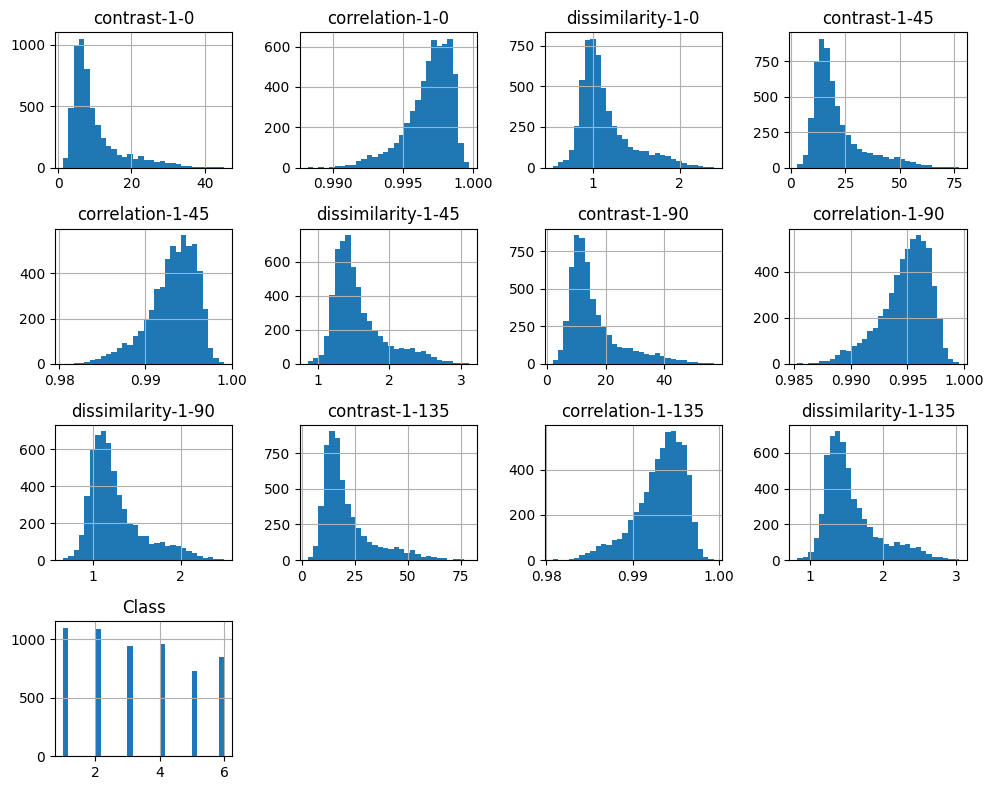

In [39]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Modelling

In [18]:
# Fungsi aktivasi ReLU dan turunannya
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Inisialisasi bobot dengan Kaiming He
def kaiming_he_initialization(shape):
    return np.random.randn(*shape) * np.sqrt(2 / shape[0])

# Model neural network sederhana
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.learning_rate = learning_rate

        # Inisialisasi bobot dan bias
        self.W1 = kaiming_he_initialization((input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = kaiming_he_initialization((hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def backward(self, X, y):
        # Backward pass
        m = X.shape[0]

        # Hitung gradien untuk layer output
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hitung gradien untuk layer hidden
        dz1 = np.dot(dz2, self.W2.T) * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Pembaruan bobot dan bias dengan SGD
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def compute_loss(self, y_true, y_pred):
        # Hitung cross-entropy loss
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

features = df.drop(columns=['Class'])  # Semua kolom kecuali 'target'
target = df['Class']  # Kolom target

# One-Hot Encoding untuk target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(target.values.reshape(-1, 1))

# Normalisasi fitur
scaler = StandardScaler()
X_normalized = scaler.fit_transform(features.values)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Parameter model
input_size = X_train.shape[1]
hidden_size = 64
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 1000

# Inisialisasi dan pelatihan model
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
for epoch in range(epochs):
    y_pred = nn.forward(X_train)
    loss = nn.compute_loss(y_train, y_pred)
    nn.backward(X_train, y_train)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

# Evaluasi model pada data test
y_test_pred = nn.forward(X_test)
test_loss = nn.compute_loss(y_test, y_test_pred)
print(f"Test Loss: {test_loss:.4f}")

Epoch 100/1000, Loss: 1.4729
Epoch 200/1000, Loss: 1.3994
Epoch 300/1000, Loss: 1.3504
Epoch 400/1000, Loss: 1.3151
Epoch 500/1000, Loss: 1.2846
Epoch 600/1000, Loss: 1.2632
Epoch 700/1000, Loss: 1.2461
Epoch 800/1000, Loss: 1.2320
Epoch 900/1000, Loss: 1.2201
Epoch 1000/1000, Loss: 1.2099
Test Loss: 1.2240


In [36]:
# Evaluasi model pada data test
y_test_pred = nn.forward(X_test)
test_loss = nn.compute_loss(y_test, y_test_pred)
print(f"Test Loss: {test_loss:.4f}")

# Dekode label dari one-hot encoding ke integer
y_test_decoded = np.argmax(y_test, axis=1)
y_pred_decoded = np.argmax(y_test_pred, axis=1)

# Hitung akurasi
accuracy = np.mean(y_test_decoded == y_pred_decoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 1.2240
Test Accuracy: 46.73%
